In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('Credit Card Transactions.csv')

In [14]:
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [15]:
df['Default_On_Payment'].value_counts()


0    3505
1    1495
Name: Default_On_Payment, dtype: int64

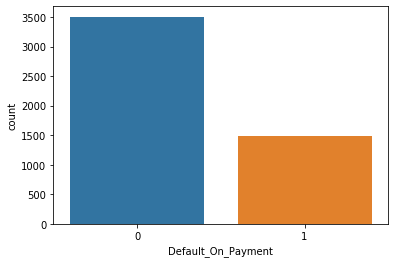

In [16]:
import seaborn as sns

sns.countplot(x ="Default_On_Payment",data=df,)

In [17]:
print("% Distribution of Data")
df['Default_On_Payment'].value_counts() / len(df)

% Distribution of Data


0    0.701
1    0.299
Name: Default_On_Payment, dtype: float64

In [18]:
df_sample = df[df['Default_On_Payment'] == 0].sample(n=2000,)
print(df_sample.index)
df.head()

Int64Index([4665, 4264, 4688, 1937, 4081,  572,  817, 2515, 2061, 1732,
            ...
            1821, 1940, 3663, 2340, 3481, 1630, 1537,  560, 3582, 4735],
           dtype='int64', length=2000)


,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [19]:
type(list(df_sample.index))

list

In [20]:
df.drop(labels=df_sample.index, inplace=True)
print(df.shape)
df.head()

(3000, 23)


,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1
5,100006,A14,36,A32,A46,9055,A65,A73,2,A93,...,35,A143,A153,1,A172,2,A192,A201,0,1
7,100008,A12,36,A32,A41,6948,A61,A73,2,A93,...,35,A143,A151,1,A174,1,A192,A201,0,1


In [21]:
df.reset_index(inplace=True, drop=True)
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1
3,100006,A14,36,A32,A46,9055,A65,A73,2,A93,...,35,A143,A153,1,A172,2,A192,A201,0,1
4,100008,A12,36,A32,A41,6948,A61,A73,2,A93,...,35,A143,A151,1,A174,1,A192,A201,0,1


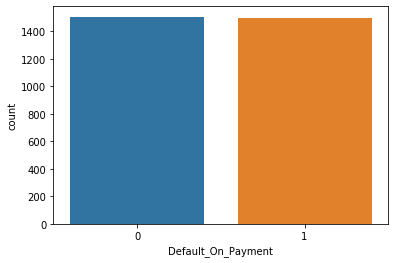

In [24]:
sns.countplot(x ="Default_On_Payment",data=df,)

In [25]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
Customer_ID                    3000 non-null int64
Status_Checking_Acc            3000 non-null object
Duration_in_Months             3000 non-null int64
Credit_History                 3000 non-null object
Purposre_Credit_Taken          3000 non-null object
Credit_Amount                  3000 non-null int64
Savings_Acc                    3000 non-null object
Years_At_Present_Employment    3000 non-null object
Inst_Rt_Income                 3000 non-null int64
Marital_Status_Gender          3000 non-null object
Other_Debtors_Guarantors       3000 non-null object
Current_Address_Yrs            3000 non-null int64
Property                       3000 non-null object
Age                            3000 non-null int64
Other_Inst_Plans               3000 non-null object
Housing                        3000 non-null object
Num_CC                         3000 non-null int64
Job             

In [27]:
for i in df.columns:
    print(i)
    if isinstance(df[i][0], str):
        df[i] = LE.fit_transform(df[i])

Customer_ID
Status_Checking_Acc
Duration_in_Months
Credit_History
Purposre_Credit_Taken
Credit_Amount
Savings_Acc
Years_At_Present_Employment
Inst_Rt_Income
Marital_Status_Gender
Other_Debtors_Guarantors
Current_Address_Yrs
Property
Age
Other_Inst_Plans
Housing
Num_CC
Job
Dependents
Telephone
Foreign_Worker
Default_On_Payment
Count


In [28]:
df.drop(labels=["Customer_ID", "Count"], axis=1, inplace=True)
df.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,0
2,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
3,3,36,2,7,9055,4,2,2,2,0,...,3,35,2,2,1,1,2,1,0,0
4,1,36,2,1,6948,0,2,2,2,0,...,2,35,2,0,1,3,1,1,0,0


In [29]:
marital_status_dummy =  pd.get_dummies(df['Marital_Status_Gender'], drop_first=True, prefix='Marital_status')
marital_status_dummy.head()
df.drop('Marital_Status_Gender', axis=1, inplace=True)

In [30]:
df = pd.concat([df, marital_status_dummy], axis=1, )

In [31]:
x = df.drop('Default_On_Payment', axis=1)
y = df.Default_On_Payment.values.reshape(-1,1)
# y = pd.get_dummies(y)

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.20, random_state=42)
trainX.head()
# trainY.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Other_Debtors_Guarantors,Current_Address_Yrs,...,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Marital_status_1,Marital_status_2,Marital_status_3
642,0,42,2,4,3965,0,1,4,0,3,...,2,1,1,2,1,0,0,0,1,0
700,3,24,2,9,4591,3,2,2,0,3,...,2,1,3,3,1,1,0,0,1,0
226,0,12,2,3,2578,0,0,3,0,4,...,2,2,1,3,1,0,0,1,0,0
1697,3,24,3,9,2375,2,2,4,0,2,...,2,1,2,2,2,1,0,0,1,0
1010,1,15,2,6,2631,1,2,3,0,2,...,2,1,1,1,1,0,0,1,0,0


In [32]:
trainY

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [34]:
trainX = ss.fit_transform(trainX)
testX = ss.transform(testX)
trainX
trainX.shape

(2400, 22)

In [35]:
# numFeatures is the number of features in our input data.
numFeatures = trainX.shape[1]
print(numFeatures)
# numLabels is the number of classes our data points can be in.
numLabel = 1

22


In [36]:
graph = tf.Graph()

In [38]:
with graph.as_default():
    x = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None,numFeatures))
    y = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None, numLabel))
    
    
    weight4HiddenLayer1 = tf.Variable(tf.compat.v1.random_normal(shape=(numFeatures,10),
                                                                 mean=0,
                                                                 stddev = 0.01,
                                                                 name ="Wieght_for_hidden_Layer_1"))
    
    weight4HiddenLayer2 = tf.Variable(tf.compat.v1.random_normal(shape=(10,10),
                                                                 mean=0,
                                                                 stddev = 0.01,
                                                                 name ="Wieght_for_hidden_Layer_2"))
    
    weight4OutputLayer = tf.Variable(tf.compat.v1.random_normal(shape=(10, numLabel),
                                                                 mean=0,
                                                                 stddev = 0.01,
                                                                 name ="Wieght_for_Output_Layer"))
    
    bias1 = tf.Variable(tf.compat.v1.random_normal(shape=(1,10),
                                                    mean=0,
                                                    stddev = 0.01,
                                                    name ="bias_for_hidden_Layer_1"))
        
    bias2 = tf.Variable(tf.compat.v1.random_normal(shape=(1,10),
                                                    mean=0,
                                                    stddev = 0.01,
                                                    name ="bias_for_hidden_Layer_2"))
        
    bias3 = tf.Variable(tf.compat.v1.random_normal(shape=(1,numLabel),
                                                    mean=0,
                                                    stddev = 0.01,
                                                    name ="bias_for_Output_Layer"))
    
    
    
    apply_op_4_layer1 = tf.add(tf.matmul(x, weight4HiddenLayer1, name="Multiply_4Layer1"), bias1, name="Add_bias_to_layer1")
    activation_layer1 = tf.nn.relu(apply_op_4_layer1, name='Activation_Function_Layer1')
    
    apply_op_4_layer2 = tf.add(tf.matmul(activation_layer1, weight4HiddenLayer2, name="Multiply_4Layer2"), bias2, name="Add_bias_to_layer2")
    activation_layer2 = tf.nn.relu(apply_op_4_layer2, name='Activation_Function_Layer2')
    
    apply_op_4_Output_layer =tf.matmul(activation_layer2, weight4OutputLayer, name="Multiply_4Output")
    activation_output= tf.sigmoid(apply_op_4_Output_layer, name='Activation_Function_OutputLayer')

    
    learning_rate = tf.compat.v1.train.exponential_decay(learning_rate=0.01,
                                                         global_step=1,
                                                         decay_steps=trainX.shape[0],
                                                         decay_rate=0.97,
                                                         staircase=True )
    
    loss = (tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=activation_output, name="Cost_function"))
    cost_fun = tf.reduce_mean(loss, axis=0)
    
    training_OP = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_fun)
    
    variable_init = tf.compat.v1.global_variables_initializer()
    
#     correct_prediction = tf.equal(tf.argmax(activation_output,axis=1), tf.argmax(y, axis=1))

    threshold = tf.constant(value=0.5, dtype=tf.float32, name = "Threshold_value")
    prediction = tf.cast(tf.math.greater_equal(activation_output, threshold), dtype=tf.float32)
    
    correct_prediction = tf.equal(prediction, y)
    accuracy =  tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))
    
    
    
    
#     print("------------Activation Output-------------")
#     print(sess.run(activation_output, feed_dict = {y: trainY, x:trainX}))
#     print("----------Cross_entropy---------------")
#     print(sess.run(cross_entropy, feed_dict = {y: trainY, x:trainX}))
#     print("\n------------Correct Prediction---------------------")
#     print(sess.run(correct_prediction, feed_dict = {y: trainY, x:trainX}))
#     print("\n------------Accuracy Score---------------------")
#     print(sess.run(accuracy, feed_dict = {y: trainY, x:trainX}))

#     print(sess.run(correct_prediction, feed_dict = {y: trainY, x:trainX}))



In [52]:
NumOfEpoch = 100000
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_value = []

sess = tf.compat.v1.Session(graph=graph)
sess.run(variable_init)


for i in range(NumOfEpoch):
    
        step = sess.run(training_OP, feed_dict = {y:trainY, x:trainX})
        
        if i%1000 ==0:
#             epoch_values.append(i)

            traing_accuracy , error = sess.run([accuracy, cost_fun], feed_dict = {y:trainY, x:trainX})
            accuracy_values.append(traing_accuracy)
            cost_value.append(error)
            print(f"At epoch {i:7}, Training Accuracy : {traing_accuracy:10}, cost : {error} ")




At epoch   0, Training Accuracy : 0.4962500035762787, cost : [0.7259557] 
At epoch 1000, Training Accuracy : 0.4962500035762787, cost : [0.7259525] 
At epoch 2000, Training Accuracy : 0.5037500262260437, cost : [0.72595054] 
At epoch 3000, Training Accuracy : 0.5037500262260437, cost : [0.7259495] 
At epoch 4000, Training Accuracy : 0.5037500262260437, cost : [0.7259468] 
At epoch 5000, Training Accuracy : 0.5037500262260437, cost : [0.7259448] 
At epoch 6000, Training Accuracy : 0.5037500262260437, cost : [0.7259315] 
At epoch 7000, Training Accuracy : 0.5037500262260437, cost : [0.72591084] 
At epoch 8000, Training Accuracy : 0.5037500262260437, cost : [0.72588193] 
At epoch 9000, Training Accuracy : 0.5037500262260437, cost : [0.7258192] 
At epoch 10000, Training Accuracy : 0.5037500262260437, cost : [0.72569746] 
At epoch 11000, Training Accuracy : 0.5037500262260437, cost : [0.72547585] 
At epoch 12000, Training Accuracy : 0.5037500262260437, cost : [0.7250655] 
At epoch 13000, Tr

In [53]:
y_pred = sess.run(prediction, feed_dict={x:testX})

In [54]:
sess.run(accuracy, feed_dict={x:testX, y:testY})

0.77

C:\Users\Sunny\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Sunny\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


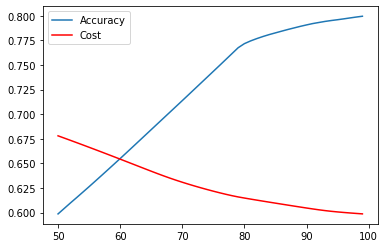

In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(accuracy_values[i-50:i]) for i in range(len(accuracy_values))], label = 'Accuracy')
plt.plot([np.mean(cost_value[i-50:i]) for i in range(len(accuracy_values))],'r', label = 'Cost',)

plt.legend()
plt.show()